# Survival Analysis

__Survival analysis__ also known as time-to-event analysis is a branch in statistics whose approach is used to investigate the time it takes for an event to occur. Survival analysis is used in various fields such as:
- _Medical_: Understanding patient’s survival when diagnosed with a deadly disease. 
- _Industry_:Failure- time analysis of a product.
- _Human resource_: When an employee would leave a company (churn).

There are various methods used in survival analysis to understand the time to event data. Here, we are going to learn, the following types of models and try to understand their mechanism in time to event analysis.

If you are a new to survival analysis and/or wish to understand better as to what survival analysis entails, I'd suggest the following reading materials.
- https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_survival/BS704_Survival_print.html
- https://boostedml.com/2018/11/when-should-you-use-non-parametric-parametric-and-semi-parametric-survival-analysis.html?utm_source=pocket_mylist
- https://data.princeton.edu/wws509/notes/c7s1


## Aim of the project
The aim of the project is to predict whether the patient will survive after 5 years or not depending on the patient's age, year of operation and positive auxilliary nodes.

## Data description

- __Age__: Age of patient at time of operation
- __operation_year__: Patient's year of operation (year - 19XX)
- __axil_nodes__: Number of positive axillary nodes detected
- __survival after 5 yrs__: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [1]:
#import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

#import survival libraries
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
#import dataset
df= pd.read_csv("C:/Users/TAkinyi/Desktop/Tracy Stuff/Datasets/Survival/haberman.csv")

In [88]:
df.head()

,Age,operation_year,axil_nodes,survival_after_5_yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Observations
- Our datasaet has no missing values .Hence no need to perform data imputation
- Survival_after_5_yrs is an integer and needs to be converted to categrical variable using label encoding.

In [89]:
print(list(df['survival_after_5_yrs'].unique())

[1, 2]


In [80]:
#label encode survival after 5 years
df['survival_after_5_yrs']=df['survival_after_5_yrs'].map({1:"yes",2:"no"})
df['survival_after_5_yrs']=df['survival_after_5_yrs'].astype('category')
print(df.head())

   Age  operation_year  axil_nodes survival_after_5_yrs
0   30              64           1                  yes
1   30              62           3                  yes
2   30              65           0                  yes
3   31              59           2                  yes
4   31              65           4                  yes


### Summary Statistics


In [13]:
print(df.describe())

              Age  operation_year  axil_nodes
count  306.000000      306.000000  306.000000
mean    52.457516       62.852941    4.026144
std     10.803452        3.249405    7.189654
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     60.750000       65.750000    4.000000
max     83.000000       69.000000   52.000000


In [12]:
print("Number of rows:" +str(df.shape[0]))
print("Number of columns:" +str(df.shape[1]))
print("Columns:" + ",".join(df.columns))

print("Survival status after 5 years distribution")
print(df.iloc[:, -1].value_counts())
print("-"*60)
print(df.iloc[:,-1].value_counts(normalize = True))

Number of rows:306
Number of columns:4
Columns:Age,operation_year,axil_nodes,survival_after_5_yrs
Survival status after 5 years distribution
yes    225
no      81
Name: survival_after_5_yrs, dtype: int64
------------------------------------------------------------
yes    0.735294
no     0.264706
Name: survival_after_5_yrs, dtype: float64


#### Observations
- The dataset has 306 variables.
- The median age of the patients is 52 ,with ages varying fro 30 to 83.
- 73 % of the patients survive after 5 years.
- The maximum number of positive auxilliary nodes detected was 52 , with 75% of the patients having less than 5 nodes and 25%  of the patients having no positive nodes.

## Exploratory Data Analysis

Distribution plots are used to visually assess how data points are distributed with respect to its frequency.For histograms, each data point placed into bins,the height of the bars representing each group increases with increase in the number of data points that lie within that group. The density plots show the skewness of the data.

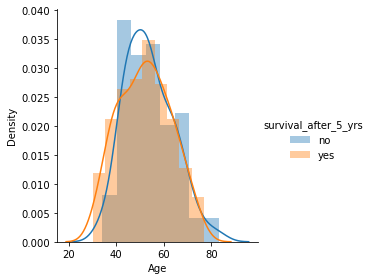

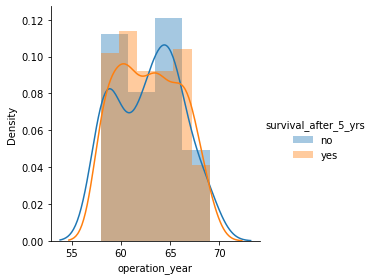

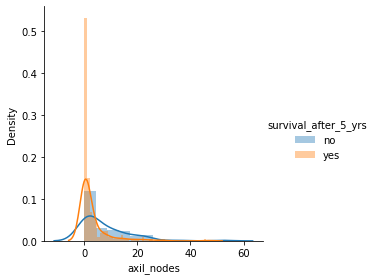

In [16]:
#Distribution plots
import warnings
warnings.filterwarnings("ignore")
for idx, feature in enumerate(list(df.columns)[:-1]):
    pt = sns.FacetGrid(df,hue="survival_after_5_yrs", size=4)
    pt.map(sns.distplot, feature).add_legend()
    plt.show()

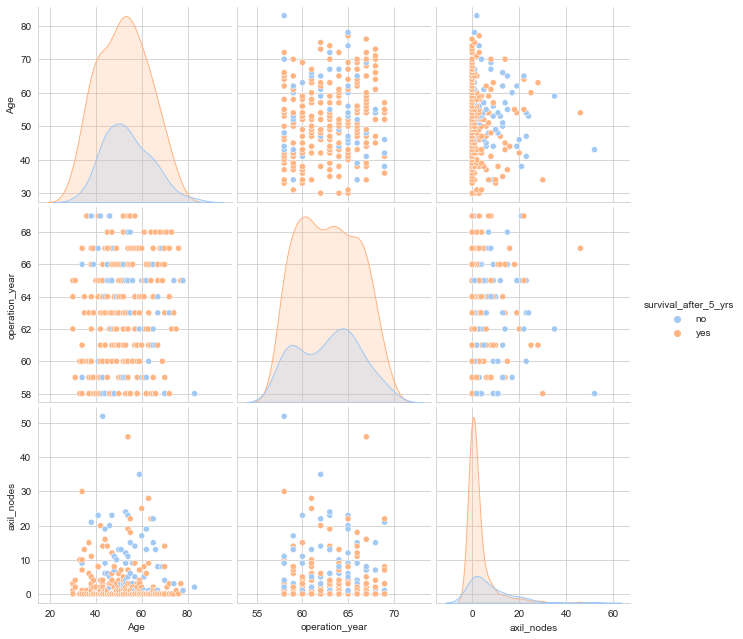

In [21]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df,hue="survival_after_5_yrs",palette="pastel",height=3);
plt.show()

<AxesSubplot:>

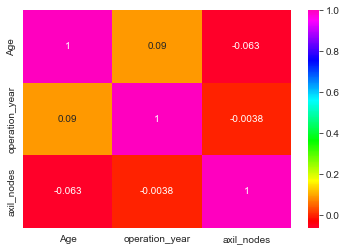

In [25]:
#sns heatmap
sns.heatmap(df.corr(),annot=True,cmap="gist_rainbow")

No strong correlation is observed between the variables.

We can construct pdf and cdf graphs for the parameters

~~~~~~~~~~Age~~~~~~~~~~~~
Bin edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
~~~~~~~~~~operation_year~~~~~~~~~~~~
Bin edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
~~~~~~~~~~axil_nodes~~~~~~~~~~~~
Bin edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.  

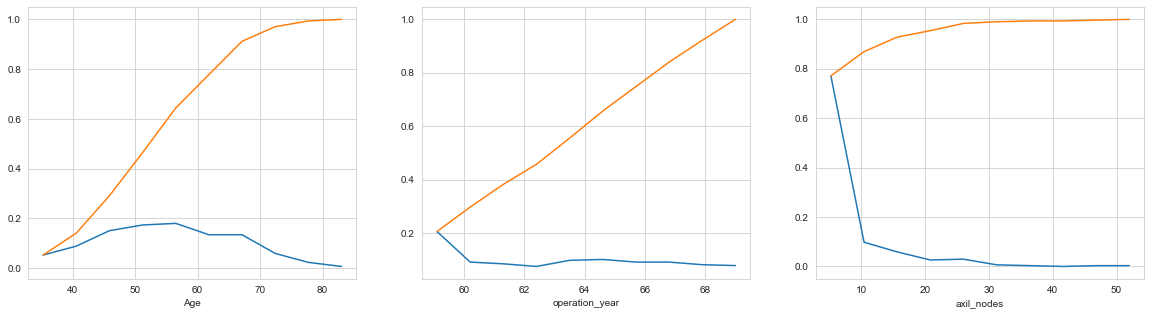

In [29]:
#CDF
plt.figure(figsize=(20,5))
for idx,feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1,3, idx+1)
    print("~~~~~~~~~~"+feature+"~~~~~~~~~~~~")
    counts,bin_edges=np.histogram(df[feature],bins=10,density=True)
    print("Bin edges: {}".format(bin_edges))
    pdf=counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf =np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
    plt.xlabel(feature)

Since auxilliary nodes is a very useful feature to identify the survival status of the patients, we can use CDF to calculate the exact percentage of patients that will survive and those who won't survive

CDF: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


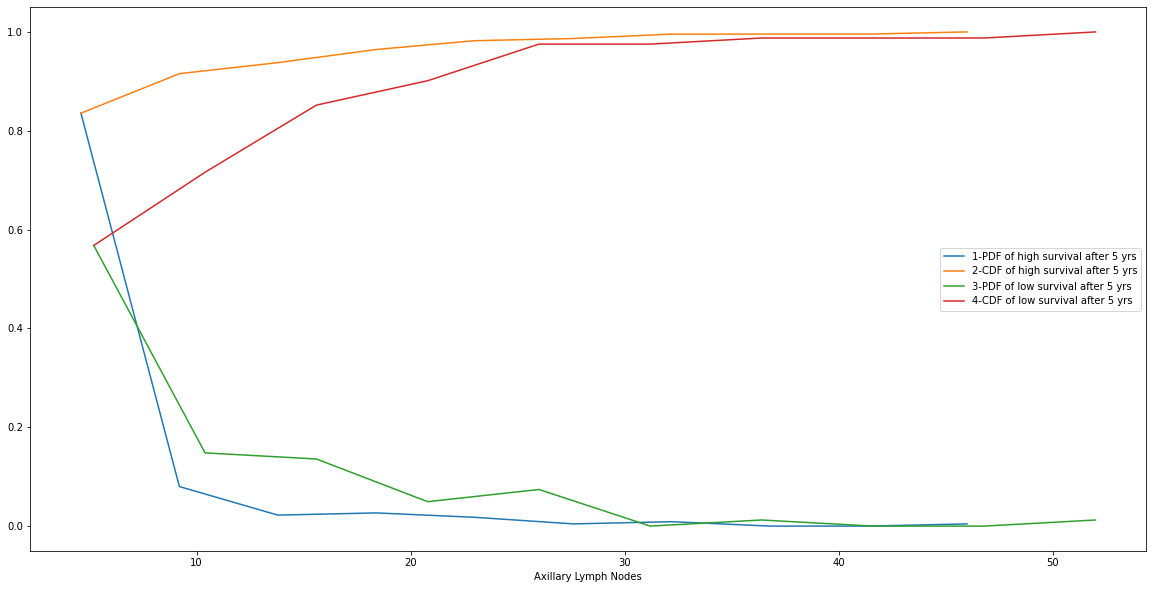

In [8]:
yes=df.loc[df["survival_after_5_yrs"]==1];
no=df.loc[df["survival_after_5_yrs"]==2];

plt.figure(figsize=(20,10))

counts,bin_edges=np.histogram(yes['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts) #prints the pdf
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)#prints bin edges

counts,bin_edges=np.histogram(no['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts) #prints the pdf
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)#prints bin edges
      
plt.xlabel("Axillary Lymph Nodes")
plt.legend(["1-PDF of high survival after 5 yrs","2-CDF of high survival after 5 yrs",
           "3-PDF of low survival after 5 yrs","4-CDF of low survival after 5 yrs"])
plt.show()

#### Observation
- There is an approximately over 80% chance of survival after 5 years if the number of auxilliary nodes detected is less than 4.
- We can also observe from the PDF plot that an increase in auxilliary nodes lowers the chance of survival.Therefore,if the nodes are greater than 40 ,the chance of survival after 5 years is low.

<AxesSubplot:xlabel='survival_after_5_yrs', ylabel='axil_nodes'>

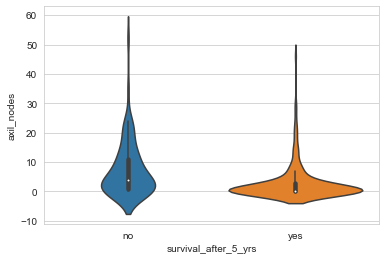

In [37]:
#violin plots
sns.violinplot(x="survival_after_5_yrs",y="axil_nodes",data=df,height=5)

<AxesSubplot:xlabel='survival_after_5_yrs', ylabel='Age'>

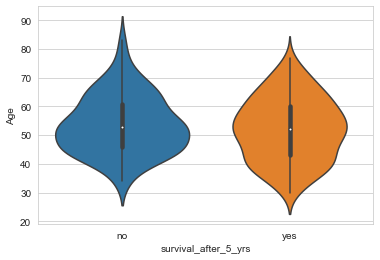

In [39]:
#violin plots
sns.violinplot(x="survival_after_5_yrs",y="Age",data=df,height=5)

<AxesSubplot:xlabel='survival_after_5_yrs', ylabel='operation_year'>

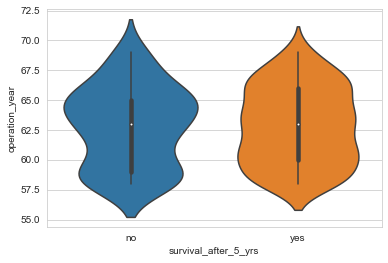

In [41]:
sns.violinplot(x="survival_after_5_yrs",y="operation_year",data=df,height=5)

## Survival Analysis


The survival analysis is based on the probability that the event of interest has not occurred at time t. A Survival function depending on time  S(t)  is generally used to represent that probability.

 __S(t)=P(T>t)__
 

In other words,  _S(t)_  corresponds to the probability of survival after time  _t_ . Here,  _T_  corresponds to the random lifetime taken from the population. Note that  _S(t)_  is between zero and one (inclusive), and  _S(t)_  is a decreasing function of  _t_ .


#### Hazard Function

The Hazard Function, is defined as the probability that the subject will experience an event of interest within a small time interval, provided that the individual has survived until the beginning of that interval. It is the rate calculated over a time period and this rate is considered constant. It can also be considered as the risk of experiencing the event of interest at time _t_. It is the number of subjects experiencing an event in the interval beginning at time _t_ divided by the product of the number of subjects surviving at time t and interval width. Since the probability of a continuous random variable to equal a particular value is zero. That’s why we consider the probability of the event happening at a particular interval of time from T till  _(T+ΔT)_ . More on this can be found in this link: https://data.princeton.edu/wws509/notes/c7s1

In [81]:
df_survival_after_5_yrs= pd.get_dummies(df['survival_after_5_yrs'])

def survival_after_5_yrs_to_numeric(x):
        if x=='no': return 2
        if x=='yes':   return 1

# Applying the function to the gender variable
df['survival_after_5_yrs_num'] = df['survival_after_5_yrs'].apply(survival_after_5_yrs_to_numeric)
print(df)



     Age  operation_year  axil_nodes survival_after_5_yrs  \
0     30              64           1                  yes   
1     30              62           3                  yes   
2     30              65           0                  yes   
3     31              59           2                  yes   
4     31              65           4                  yes   
..   ...             ...         ...                  ...   
301   75              62           1                  yes   
302   76              67           0                  yes   
303   77              65           3                  yes   
304   78              65           1                   no   
305   83              58           2                   no   

    survival_after_5_yrs_num  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
..                       ...  
301                        1  
302                

#### The Kaplan-Meier Curve.

To begin with survival analysis, the first step is to plot a survival curve of the overall data. It can be done by generating a Kaplan-Maier curve.

The Kaplan-Meier approach, is a popular approach which re-estimates the survival probability each time an event occurs. It is a non-parametric method, means it does not assume the distribution of the outcome variable (i.e., time).

The curve illustrates how the survival probabilities changes over the time horizon. As the time passes, the survival probabilities of the cancer patents reduces.

<AxesSubplot:xlabel='timeline'>

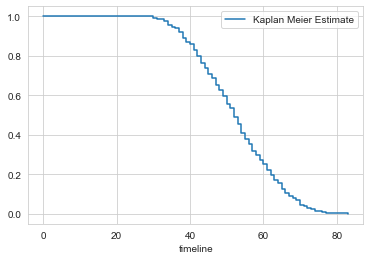

In [65]:
#km plot

X=df.Age
E=df.survival_after_5_yrs_num
km=KaplanMeierFitter()
km.fit(X,E,label="Kaplan Meier Estimate")
km.plot(ci_show=False)

<AxesSubplot:xlabel='timeline'>

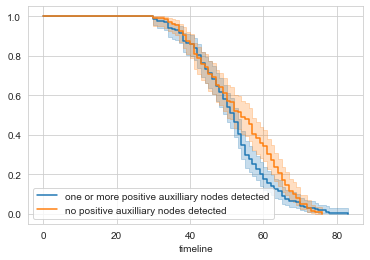

In [66]:
km2=KaplanMeierFitter()
groups=df['axil_nodes']
i1 = (groups >=1)
i2 = (groups< 1)

km2.fit(X[i1],E[i1],label="one or more positive auxilliary nodes detected")
a1=km2.plot()

km2.fit(X[i2],E[i2],label ="no positive auxilliary nodes detected")
km2.plot(ax=a1)

There are two survival curves, one for each cohort. From the curves, it is evident that patients, who have no positive auxlliary nodes, are more likely to die sooner. At around 35 years old, the two curves are almost overlapped. At any point t>45 across the timeline, we can see that the survival probability of the cohort in blue is less than the cohort in red.

#### Cox-Proportional Hazard Model
Cox-PH model is a semi-parametric model which solves the problem of incorporating covariates. In Cox’s proportional hazard model, the log-hazard is a linear function of the covariates and a population-level baseline hazard .

#### Cox-PH Model Assumptions

Cox proportional hazards regression model assumptions includes:

- Independence of survival times between distinct individuals in the sample
- A multiplicative relationship between the predictors and the hazard, and
- A constant hazard ratio over time.

#### Definition of Hazard and Hazard Ratio

__Hazard__ is defined as the slope of the survival curve. It is a measure of how rapidly subjects are dying.
The hazard ratio compares two groups. If the hazard ratio is 2.0, then the rate of deaths in one group is twice the rate in the other group.

C:\Users\TAkinyi\Anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'survival_after_5_yrs'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-06-14 06:12:24 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
operation_year  -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
axil_nodes       0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                 cmp to     z    p   -log2(p)
covariate                                    
operation_year     0.00 -1.39 0.16       2.61
axil_nodes         0.00  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<AxesSubplot:xlabel='log(HR) (95% CI)'>

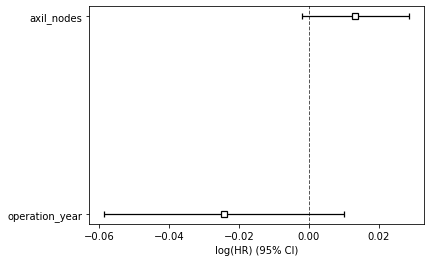

In [13]:
#cox ph model
cph=CoxPHFitter()

cph.fit(df,"Age",event_col="survival_after_5_yrs")
cph.print_summary()
cph.plot()

#### Interpretation of the model
- axil_nodes has a coefficient of about 0.01. We can recall that in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. Here, the value of exp(-0.01) is called the hazard ratio.
- It shows that a one unit increase in axil_nodes means the baseline hazard will increase by a factor of 
  exp(0.01) = 1.01 ⇾ a 1% increase.
- The large CI indicates that more data are needed.

We can use our fitted model to see how the survival changes as we change the covariate values. Here, I have used the __plot_partial_effects_on_outcome( )__ method to see how the survival varies for axil_nodes 0,20,40 of the patients compared to their baseline function. It clearly highlights that patients with lower axil_nodes hve higher survival probabilities at any given instance of time compared to those with higher axil_nodes.

<AxesSubplot:>

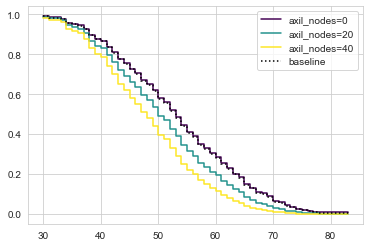

In [98]:
cph.plot_partial_effects_on_outcome(covariates = 'axil_nodes', values = [0, 20,40], cmap = 'viridis')

Now let's randomly select our patients and plot a survival curve for the patients.

     operation_year  axil_nodes
2                65           0
120              62           1
300              63           0


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

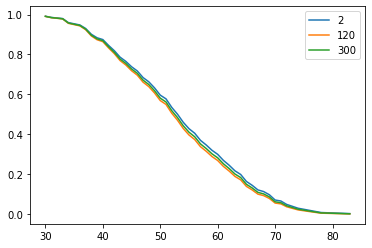

In [18]:
patients = [2,120,300]

rows_selected = df.iloc[patients, 1:3]
print(rows_selected)


cph.fit(df,"Age",event_col="survival_after_5_yrs")
cph.predict_survival_function(rows_selected).plot()

Patient 2 has the highest survival followed by patient 300 and patient 120.

Thank you for taking your time to read this notebook!